In [49]:
#dependencies
import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import gmaps


file_path = '../../Resources/crime_data.csv'
file = pd.read_csv(file_path)

data = [file['Date Rptd'], file['DATE OCC'], file['TIME OCC'], file['AREA NAME'], file['Crm Cd Desc'], 
       file['Vict Age'],file['Vict Sex'], file['Vict Descent'], file['Premis Desc'], file['Weapon Desc'], 
       file['LOCATION'], file['LAT'], file['LON']]
df = pd.DataFrame(data)
df = df.transpose()


# Import API key
from api_keys import g_key

df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,Southwest,BATTERY - SIMPLE ASSAULT,36,F,B,SINGLE FAMILY DWELLING,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",1100 W 39TH PL,34.0141,-118.2978
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,Central,BATTERY - SIMPLE ASSAULT,25,M,H,SIDEWALK,UNKNOWN WEAPON/OTHER WEAPON,700 S HILL ST,34.0459,-118.2545
2,09/16/2020 12:00:00 AM,09/16/2020 12:00:00 AM,1230,77th Street,VANDALISM - MISDEAMEANOR ($399 OR UNDER),62,M,B,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,700 E 73RD ST,33.9739,-118.263
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,N Hollywood,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,5400 CORTEEN PL,34.1685,-118.4019
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,Mission,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,BEAUTY SUPPLY STORE,NaN,14400 TITUS ST,34.2198,-118.4468


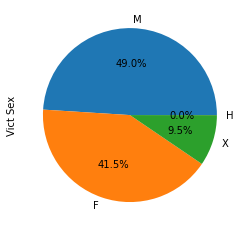

In [31]:
#pie chart showing victim gender given with data
gender_values = df['Vict Sex'].value_counts()
gender_pie = gender_values.plot(kind ='pie', autopct='%1.1f%%')

In [32]:
race = df['Vict Descent'].value_counts()
race

H    92582
W    64117
B    43301
X    27630
O    24061
A     6468
K     1367
F      906
C      721
J      296
V      216
I      184
Z       76
P       57
U       40
G       23
S       14
D       12
L        9
Name: Vict Descent, dtype: int64

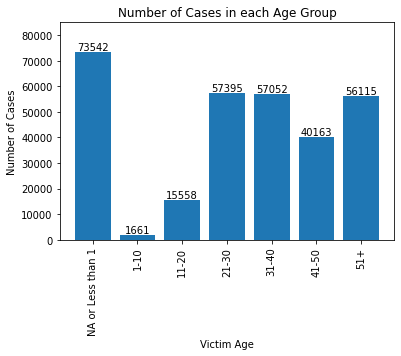

In [33]:
#bar chart refering to number of crimes occured where victim is of a certain age group
age_sort = df.sort_values(by = ['Vict Age'])
age_count = age_sort['Vict Age'].value_counts()
x = age_sort['Vict Age'].unique()

age_data = age_sort['Vict Age']
age_data = age_data.reset_index(drop=True)


not_listed = 0
ten = 0
twenty = 0
thirty = 0
forty = 0
fifty = 0
older = 0

for age in age_data:
    
    if age <= 0:
        not_listed += 1
    elif age < 11:
        ten += 1
    elif age < 21:
        twenty += 1
    elif age < 31:
        thirty += 1
    elif age < 41:
        forty += 1
    elif age < 51:
        fifty += 1
    else:
        older += 1

x = ['NA or Less than 1', '1-10', '11-20', '21-30', '31-40', '41-50', '51+']
y = [not_listed, ten, twenty, thirty, forty, fifty, older]
plt.bar(x, y, align = 'center')
plt.xticks(rotation = 'vertical')
plt.xlabel('Victim Age')
plt.ylabel('Number of Cases')
plt.title('Number of Cases in each Age Group')
for x, v in enumerate(y):
    plt.text(x, v, str(v), horizontalalignment = 'center', verticalalignment = 'bottom')
plt.ylim(0, 85000)
plt.show()

In [34]:
#according to the data, the most frequent crime that occurs in LA is vehicle theft
df['Crm Cd Desc'].value_counts().head(10)

VEHICLE - STOLEN                                           32553
BATTERY - SIMPLE ASSAULT                                   24615
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    20017
BURGLARY FROM VEHICLE                                      19396
BURGLARY                                                   19045
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             18186
INTIMATE PARTNER - SIMPLE ASSAULT                          16531
THEFT PLAIN - PETTY ($950 & UNDER)                         16443
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)            13921
THEFT OF IDENTITY                                          11819
Name: Crm Cd Desc, dtype: int64

In [35]:
#none of these areas should be disregarded, however due to our limited time, we will be focusing on the area that
#pertains to the most vehicle theft cases (77th Street)
stolen_vehicle = df.loc[df['Crm Cd Desc']== 'VEHICLE - STOLEN']
#stolen_vehicle.head()
stolen_vehicle['AREA NAME'].value_counts()

77th Street    2504
Newton         2381
Southeast      2084
Hollenbeck     1951
Pacific        1764
Mission        1762
Harbor         1742
Southwest      1699
Northeast      1644
Olympic        1520
Rampart        1502
N Hollywood    1485
Foothill       1448
Van Nuys       1391
Hollywood      1191
West Valley    1183
Devonshire     1114
Wilshire       1095
Topanga        1090
Central        1005
West LA         998
Name: AREA NAME, dtype: int64

In [36]:
df['TIME OCC'].value_counts()

1200    10801
1800     8616
1700     8288
2000     8000
1900     7396
        ...  
609         2
632         2
757         2
841         2
741         1
Name: TIME OCC, Length: 1439, dtype: int64

In [37]:
noon_crimes = df.loc[df['TIME OCC']== 1200]
noon_crimes['Crm Cd Desc'].value_counts()

THEFT OF IDENTITY                                  1514
VEHICLE - STOLEN                                   1043
BURGLARY                                            829
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)     817
THEFT PLAIN - PETTY ($950 & UNDER)                  614
                                                   ... 
DOCUMENT WORTHLESS ($200 & UNDER)                     1
VIOLATION OF TEMPORARY RESTRAINING ORDER              1
ILLEGAL DUMPING                                       1
BOAT - STOLEN                                         1
CHILD ABANDONMENT                                     1
Name: Crm Cd Desc, Length: 100, dtype: int64

In [38]:
stolen_vehicle['TIME OCC'].value_counts()

2000    1850
1800    1779
1900    1632
2200    1614
1700    1524
        ... 
1324       1
357        1
1319       1
1318       1
1213       1
Name: TIME OCC, Length: 833, dtype: int64

In [39]:
ss_street = stolen_vehicle.loc[stolen_vehicle['AREA NAME'] == '77th Street']
ss_street['TIME OCC'].value_counts().head(7)

2200    135
2100    135
2000    132
1800    114
1900    111
1700    107
2300     96
Name: TIME OCC, dtype: int64

In [47]:
filtered_sv = ss_street.loc[ss_street['TIME OCC'].isin([2200, 2100, 2000, 1800, 1900])]
                            
filtered_sv['Premis Desc'].value_counts()

STREET                         578
DRIVEWAY                        21
PARKING LOT                     19
ALLEY                            6
GARAGE/CARPORT                   2
YARD (RESIDENTIAL/BUSINESS)      1
Name: Premis Desc, dtype: int64

In [48]:
locations = filtered_sv[['LAT', 'LON']]

fig = gmaps.figure(center = (20.0, 15.0), zoom_level = 2)
markers = gmaps.marker_layer(locations, info_box_content = "test")

fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,LOCATION,LAT,LON
137,05/27/2020 12:00:00 AM,05/25/2020 12:00:00 AM,1640,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,48TH ST,33.9997,-118.2827
801,03/28/2020 12:00:00 AM,03/28/2020 12:00:00 AM,240,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,3000 W SLAUSON AV,33.9891,-118.3258
1295,03/24/2020 12:00:00 AM,03/21/2020 12:00:00 AM,900,77th Street,VEHICLE - STOLEN,0,F,B,STREET,NaN,84TH PL,33.9624,-118.2783
2571,10/12/2020 12:00:00 AM,10/11/2020 12:00:00 AM,1700,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,82ND ST,33.9643,-118.2871
2859,06/01/2020 12:00:00 AM,06/01/2020 12:00:00 AM,1200,77th Street,VEHICLE - STOLEN,0,NaN,NaN,DRIVEWAY,NaN,700 E 76TH PL,33.9703,-118.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301222,03/04/2021 12:00:00 AM,03/04/2021 12:00:00 AM,430,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,800 E 82ND ST,33.9647,-118.2608
301251,02/11/2021 12:00:00 AM,02/10/2021 12:00:00 AM,2300,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,200 E 80TH ST,33.967,-118.2717
301256,05/15/2021 12:00:00 AM,05/10/2021 12:00:00 AM,1238,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,3500 W 60TH ST,33.9854,-118.3338
301443,01/11/2021 12:00:00 AM,01/10/2021 12:00:00 AM,2300,77th Street,VEHICLE - STOLEN,0,NaN,NaN,STREET,NaN,400 E 74TH ST,33.973,-118.2657


In [50]:
url = "https://data.lacity.org/resource/63jg-8b9z.json"
response = requests.get(url).json()

#setting up data to make table/DataFrame
#creating lists to 
date_reported = []
date_occured = []
time_occured = []
area_name = []
crime_desc = []
vict_age = []
gender = []
vict_descent = []
premis_description = []
weapon_used = []
location = []
lat = []
lng = []

crime_list = []
for crime in response:
    dict = {'Date Reported':crime['date_rptd'], 'Date Occured':crime['date_occ'], 'Time Occured':crime['time_occ'], 
           'Area Name':crime['area_name'], 'Crime Type':crime['crm_cd_desc'], 'Victim Age':crime['vict_age'],
           'Premise':crime['premis_desc'], 'Location':crime['location'], 'Latitude':crime['lat'], 'Longitude':crime['lon']}
    
    date_reported.append(crime['date_rptd'])
    date_occured.append(crime['date_occ'])
    time_occured.append(crime['time_occ'])
    area_name.append(crime['area_name'])
    crime_desc.append(crime['crm_cd_desc'])
    vict_age.append(crime['vict_age'])
    
    premis_description.append(crime['premis_desc'])
   
    location.append(crime['location'])
    lat.append(crime['lat'])
    lng.append(crime['lon'])
    try:
        gender.append(crime['vict_sex'])
        vict_descent.append(crime['vict_descent'])
        weapon_used.append(crime['weapon_desc'])
        dict['Victim Gender'] = crime['vict_sex']
        dict['Victim Descent']= crime['vict_descent']
        dict['Weapon Used']= crime['weapon_desc']
    except:
        gender.append("NA+x")
        vict_descent.append('NA+x')
        weapon_used.append('NA+x')
     
    crime_list.append(dict)
    

In [ ]:
#response[0]

In [52]:
#merging crime_list into dataframe
crime_df = pd.DataFrame(crime_list)
#reordering columns
crime_df = crime_df[['Date Reported', 'Date Occured', 'Time Occured', 'Area Name', 'Crime Type','Weapon Used', 
                     'Victim Age', 'Victim Gender', 'Victim Descent', 'Premise', 'Location', 
                     'Latitude', 'Longitude']]
crime_df.head(-5)

,Date Reported,Date Occured,Time Occured,Area Name,Crime Type,Weapon Used,Victim Age,Victim Gender,Victim Descent,Premise,Location,Latitude,Longitude
0,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,Newton,VIOLATION OF COURT ORDER,NaN,48,NaN,NaN,SINGLE FAMILY DWELLING,300 E GAGE AV,33.9825,-118.2695
1,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,Pacific,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",NaN,0,NaN,NaN,STREET,SEPULVEDA BL,33.9599,-118.3962
2,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,Newton,OTHER MISCELLANEOUS CRIME,NaN,0,NaN,NaN,ALLEY,1300 E 21ST ST,34.0224,-118.2524
3,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,Hollywood,VIOLATION OF COURT ORDER,HAND GUN,47,F,W,STREET,CAHUENGA BL,34.1016,-118.3295
4,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,Central,"RAPE, ATTEMPTED","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",47,F,H,ALLEY,8TH ST,34.0387,-118.2488
...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,2010-02-05T00:00:00.000,2010-02-04T00:00:00.000,1705,Central,BATTERY - SIMPLE ASSAULT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",41,F,O,SIDEWALK,6TH,34.0423,-118.2452
991,2010-02-05T00:00:00.000,2010-02-04T00:00:00.000,0100,Central,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",UNKNOWN WEAPON/OTHER WEAPON,52,M,B,"BUS DEPOT/TERMINAL, OTHER THAN MTA",800 N ALAMEDA ST,34.0563,-118.2374
992,2010-02-05T00:00:00.000,2010-02-05T00:00:00.000,0130,Central,BATTERY WITH SEXUAL CONTACT,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",49,F,W,SIDEWALK,MAIN ST,34.0482,-118.2472
993,2010-02-05T00:00:00.000,2010-02-05T00:00:00.000,0920,Central,CRIMINAL THREATS - NO WEAPON DISPLAYED,NaN,57,NaN,NaN,OTHER PREMISE,600 SAN JULIAN ST,34.0428,-118.2461
